In [25]:
import numpy as np
from iotools import read_AsciiGrid
import matplotlib.pyplot as plt

eps = np.finfo(float).eps

In [26]:
file = r'/Users/jpnousu/SpaFHy_RUNS/krycklan/gis/25m_3case/stream_depth.asc'
ditch_h = read_AsciiGrid(file)[0][175:181,175:181]
ditch_h[np.isfinite(ditch_h)] = -1.0
ditch_h[ditch_h != -1.0] = 0.0
#gwl = np.full_like(ditch_h, -2.)
gwl = np.random.uniform(-1.5, -0.5, size=ditch_h.shape)
#ele = np.full_like(ditch_h, 10)  # storage of fully saturated profile
ele = np.random.uniform(100, 110, size=ditch_h.shape)
H = ele + gwl

rows = np.shape(ditch_h)[0]
cols = np.shape(ditch_h)[1]
n = rows * cols  # length of flattened array


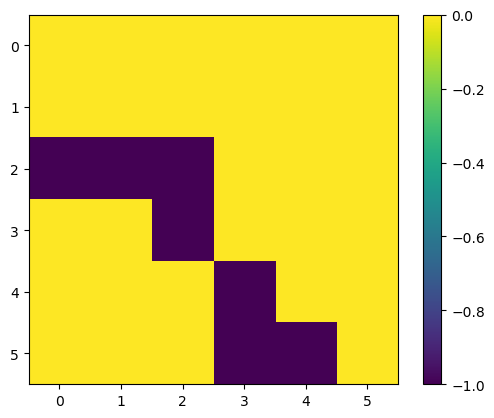

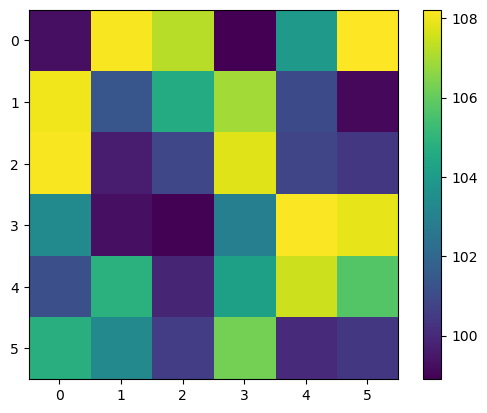

In [27]:
plt.figure(1)
plt.imshow(ditch_h); plt.colorbar()
plt.figure(2)
plt.imshow(H); plt.colorbar()


In [28]:
ditch_h = np.ravel(ditch_h)
ele = np.ravel(ele)
H = np.ravel(H)

In [29]:
# Ditches
# calculate mean H of neighboring nodes to find out whether ditch is active (constant head)
# from previous timestep to avoid switching boundary/no-boundary during iteration
H_neighbours = ditch_h.copy()
for k in np.where(ditch_h < -eps)[0]:
    print('k', k)
    H_ave = 0
    n_neigh = 0
    if k%cols != 0 and ditch_h[k-1] > -eps: # west non-ditch neighbor
            print('west neighbour!')
            H_ave += H[k-1]
            n_neigh += 1
    if (k+1)%cols != 0 and ditch_h[k+1] > -eps: # east non-ditch neighbor
            print('east neighbour!')
            H_ave += H[k+1]
            n_neigh += 1
    if k-cols >= 0 and  ditch_h[k-cols] > -eps: # north non-ditch neighbor
            print('north neighbour!')
            H_ave += H[k-cols]
            n_neigh += 1
    if k+cols < n and ditch_h[k+cols] > -eps: # south non-ditch neighbor
            print('south neighbour!')
            H_ave += H[k+cols]
            n_neigh += 1
    if n_neigh > 0:
        H_neighbours[k] = H_ave / n_neigh  # average of neighboring non-ditch nodes
        print('n_neight', n_neigh)
    else:  # corners or nodes surrounded by ditches dont have neighbors, given its ditch depth
        H_neighbours[k] = ele[k] + ditch_h[k] + eps

k 12
north neighbour!
south neighbour!
n_neight 2
k 13
north neighbour!
south neighbour!
n_neight 2
k 14
east neighbour!
north neighbour!
n_neight 2
k 20
west neighbour!
east neighbour!
south neighbour!
n_neight 3
k 27
west neighbour!
east neighbour!
north neighbour!
n_neight 3
k 33
west neighbour!
n_neight 1
k 34
east neighbour!
north neighbour!
n_neight 2


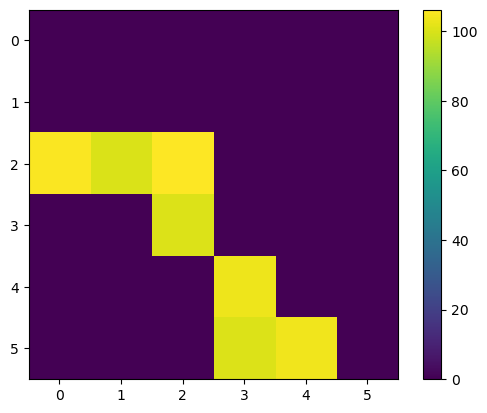

In [38]:
H_neighbours_2d = np.reshape(H_neighbours,(rows,cols))
H = np.reshape(H,(rows,cols))
ditch_h = np.reshape(ditch_h,(rows,cols))
ele = np.reshape(ele,(rows,cols))

plt.imshow(H_neighbours_2d); plt.colorbar()

In [39]:
H

array([[ 99.28887272, 108.14070739, 107.23253172,  98.89860588,
        103.94214094, 108.21788963],
       [108.00513907, 101.38509559, 104.64218075, 106.9413314 ,
        101.00360727,  99.1021587 ],
       [108.12417658,  99.60980995, 100.89242135, 107.75832016,
        100.83466796, 100.39307667],
       [103.30787219,  99.28987048,  98.95005861, 102.93816964,
        108.16117838, 107.87698725],
       [101.18236371, 104.8567436 ,  99.8634099 , 104.19384874,
        107.50672264, 105.7296199 ],
       [104.79410579, 103.28840677, 100.5776514 , 106.26364438,
        100.01700952, 100.40818538]])

In [40]:
H_for_Tr = np.where((ditch_h < -eps) & (H_neighbours_2d > ele + ditch_h),
                    H_neighbours_2d, H)

In [41]:
H_for_Tr

array([[ 99.28887272, 108.14070739, 107.23253172,  98.89860588,
        103.94214094, 108.21788963],
       [108.00513907, 101.38509559, 104.64218075, 106.9413314 ,
        101.00360727,  99.1021587 ],
       [108.12417658, 100.33748303, 106.20025046, 107.75832016,
        100.83466796, 100.39307667],
       [103.30787219,  99.28987048, 100.69715   , 102.93816964,
        108.16117838, 107.87698725],
       [101.18236371, 104.8567436 ,  99.8634099 , 104.19384874,
        107.50672264, 105.7296199 ],
       [104.79410579, 103.28840677, 100.5776514 , 106.26364438,
        103.95745401, 100.40818538]])

In [42]:
H_neighbours_2d

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [105.65650563, 100.33748303, 106.20025046,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 100.69715   ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , 103.43610073,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , 100.5776514 ,
        103.95745401,   0.        ]])

In [44]:
H

array([[ 99.28887272, 108.14070739, 107.23253172,  98.89860588,
        103.94214094, 108.21788963],
       [108.00513907, 101.38509559, 104.64218075, 106.9413314 ,
        101.00360727,  99.1021587 ],
       [108.12417658,  99.60980995, 100.89242135, 107.75832016,
        100.83466796, 100.39307667],
       [103.30787219,  99.28987048,  98.95005861, 102.93816964,
        108.16117838, 107.87698725],
       [101.18236371, 104.8567436 ,  99.8634099 , 104.19384874,
        107.50672264, 105.7296199 ],
       [104.79410579, 103.28840677, 100.5776514 , 106.26364438,
        100.01700952, 100.40818538]])